In [1]:
import os
import sys
sys.path.append('..')

import torch
import pickle
import optuna
import numpy as np
import pandas as pd

from uncertain.BPR import bprMF, biasMF, TwoWayMF, bprGMF, bprMLP
from uncertain.BPR import ABPR, GPR

from uncertain.utils.data import Data
from uncertain.utils.training import train
from uncertain.utils.evaluation_implicit import test

from matplotlib import pyplot as plt

os.chdir('Behance')

if os.path.isfile('data.pkl'):
    with open('data.pkl', 'rb') as f:
        data = pickle.load(f)
    print(f'MovieLens data prepared: {data.n_user} users, {data.n_item} items.')
    print(f'{len(data.train)} train, {len(data.val)} validation and {len(data.test)} test interactions.')
    data.batch_size = int(1e3)
else:
    data = pd.read_table('Behance_appreciate_1M', sep=' ', header=None)
    data.columns = ['user', 'item', 'timestamps']
    data = Data(data, implicit=True, users_on_test=1000, distances=False)
    with open('data.pkl', 'wb') as f:
        pickle.dump(data, f, protocol=4)

MovieLens data prepared: 14766 users, 32480 items.
571980 train, 57112 validation and 7956 test interactions.


# Baseline (BPR)

In [2]:
def objective(trial):
    
    # Parameter setup
    dim = trial.suggest_int('dim', 20, 200)
    lr = trial.suggest_float('lr', 0.1, 10)
    wd = trial.suggest_float('wd', 0.000001, 0.0001)
    
    # Train model
    model = bprMF(data.n_user, data.n_item, embedding_dim=dim, lr=lr, weight_decay=wd)
    train(model, data, path='checkpoints/baseline', name=f'trial={len(study.trials)-1}-dim={dim}-wd={wd}-lr={lr}')
    return model.trainer.callback_metrics['val_loss']

file = 'tunning/baseline.pkl'
if os.path.exists(file):
    with open(file, 'rb') as f:
        study = pickle.load(f)
else:
    study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
with open(file, 'wb') as f:
    pickle.dump(study, f, protocol=4)

# biasMF with GPR
def objective(trial):
    
    # Parameter setup
    dim = trial.suggest_int('dim', 20, 200)
    lr = trial.suggest_float('lr', 0.1, 10)
    wd = trial.suggest_float('wd', 0.000001, 0.0001)
    
    # Train model
    model = biasMF(data.n_user, data.n_item, embedding_dim=dim, lr=lr, weight_decay=wd, loss=GPR(log_scale=True))
    train(model, data, path='checkpoints/biasMF', name=f'trial={len(study.trials)}-dim={dim}-wd={wd}-lr={lr}')
    return model.trainer.callback_metrics['val_loss']

file = 'tunning/biasMF.pkl'
if os.path.exists(file):
    with open(file, 'rb') as f:
        study = pickle.load(f)
else:
    study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
with open(file, 'wb') as f:
    pickle.dump(study, f, protocol=4)

[I 2022-02-25 15:37:46,656] A new study created in memory with name: no-name-68dbc6a4-d2f6-48da-a387-884fbf7754f8
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 295 K 
1 | item_embeddings | Embedding | 649 K 
2 | rho_activation  | Softplus  | 0     
----------------------------------------------
944 K     Trainable params
0         Non-trainable params
944 K     Total params
3.780     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
[I 2022-02-25 15:38:47,018] Trial 0 finished with value: 0.6115190386772156 and parameters

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
/home/vcoscrato/.local/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  rank_zero_deprecation(
[I 2022-02-25 15:39:53,232] Trial 1 finished with value: 0.6751524209976196 and parameters: {'dim': 95, 'lr': 5.940144985708501, 'wd': 8.751224237934477e-05}. Best is trial 0 with value: 0.6115190386772156.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has 

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

[I 2022-02-25 15:44:48,253] Trial 3 finished with value: 0.6664736866950989 and parameters: {'dim': 161, 'lr': 3.8432235205491194, 'wd': 7.975148575593014e-05}. Best is trial 0 with value: 0.6115190386772156.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 531 K 
1 | item_embeddings | Embedding | 1.2 M 
2 | rho_activation  | Softplus  | 0     
----------------------------------------------
1.7 M     Trainable params
0         Non-trainable params
1.7 M     Total params
6.803     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

[I 2022-02-25 15:46:19,279] Trial 4 finished with value: 0.4264901876449585 and parameters: {'dim': 36, 'lr': 9.359576654927265, 'wd': 6.922270212568225e-06}. Best is trial 4 with value: 0.4264901876449585.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 649 K 
1 | item_embeddings | Embedding | 1.4 M 
2 | rho_activation  | Softplus  | 0     
----------------------------------------------
2.1 M     Trainable params
0         Non-trainable params
2.1 M     Total params
8.315     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

[I 2022-02-25 15:48:12,566] Trial 5 finished with value: 0.6030817627906799 and parameters: {'dim': 44, 'lr': 2.1525503579703518, 'wd': 4.521817712783594e-05}. Best is trial 4 with value: 0.4264901876449585.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 1.4 M 
1 | item_embeddings | Embedding | 3.0 M 
2 | rho_activation  | Softplus  | 0     
----------------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.387    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

[I 2022-02-25 15:49:35,813] Trial 6 finished with value: 0.6636310815811157 and parameters: {'dim': 92, 'lr': 3.853485580847818, 'wd': 7.756511903014389e-05}. Best is trial 4 with value: 0.4264901876449585.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 694 K 
1 | item_embeddings | Embedding | 1.5 M 
2 | rho_activation  | Softplus  | 0     
----------------------------------------------
2.2 M     Trainable params
0         Non-trainable params
2.2 M     Total params
8.882     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
[I 2022-02-25 15:51:32,621] Trial 7 finished with value: 0.6654346585273743 and parameters: {'dim': 47, 'lr': 1.7530381477164478, 'wd': 7.949021845780714e-05}. Best is trial 4 with value: 0.4264901876449585.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding 

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
[I 2022-02-25 15:53:40,279] Trial 8 finished with value: 0.530190110206604 and parameters: {'dim': 60, 'lr': 7.7148225858270125, 'wd': 2.2052528483159827e-05}. Best is trial 4 with value: 0.4264901876449585.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 1.4 M 
1 | item_embeddings | Embedding | 3.2 M 
2 | rho_activation  | Softplus  | 0     
----------------------------------------------
4.6 M     Trainable params
0         Non-trainable params
4.6 M     Total params
18.331    Total estimated model params si

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has 

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
[W 2022-02-25 15:56:13,273] Trial 0 failed, because the objective function returned nan.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_V

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

[I 2022-02-25 15:57:58,989] Trial 1 finished with value: 0.6357970237731934 and parameters: {'dim': 128, 'lr': 4.031080939890199, 'wd': 8.610232264459645e-05}. Best is trial 1 with value: 0.6357970237731934.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 502 K 
1 | item_embeddings | Embedding | 1.1 M 
2 | user_bias       | Embedding | 14.8 K
3 | item_bias       | Embedding | 32.5 K
4 | rho_activation  | Softplus  | 0     
----------------------------------------------
1.7 M     Trainable params
0         Non-trainable params
1.7 M     Total params
6.614     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has 

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
[I 2022-02-25 16:00:38,934] Trial 3 finished with value: 0.6179748177528381 and parameters: {'dim': 86, 'lr': 5.114455349652302, 'wd': 7.413009685179965e-05}. Best is trial 3 with value: 0.6179748177528381.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 2.1 M 
1 | item_embeddings | Embedding | 4.6 M 
2 | user_bias       | Embedding | 14.8 K
3 | item_bias       | Embedding | 32.5 K
4 | rho_activation  | Softplus  | 0     
----------------------------------------------
6.7 M     Trainable params
0         Non-

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has 

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
[I 2022-02-25 16:05:11,043] Trial 5 finished with value: 0.6062946319580078 and parameters

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has 

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
[I 2022-02-25 16:08:26,125] Trial 7 finished with value: 0.611457884311676 and parameters: {'dim': 156, 'lr': 5.358062441643588, 'wd': 6.980868175007476e-05}. Best is trial 6 with value: 0.5516817569732666.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 1.3 M 
1 | item_embeddings | Embedding | 2.8 M 
2 | user_bias       | Embedding | 14.8 K
3 | item_bias       | Embedding | 32.5 K
4 | rho_activation  | Softplus  | 0     
----------------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.253    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
[I 2022-02-25 16:09:51,543] Trial 8 finished with value: 0.5522127747535706 and parameters: {'dim': 85, 'lr': 6.607115750969785, 'wd': 4.070739978276046e-05}. Best is trial 6 with value: 0.5516817569732666.
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding |

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

[I 2022-02-25 16:11:35,118] Trial 9 finished with value: 0.6124785542488098 and parameters: {'dim': 37, 'lr': 1.7907036185418412, 'wd': 7.156233075158543e-05}. Best is trial 6 with value: 0.5516817569732666.


# AdaptiveBPR

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 1.3 M 
1 | item_embeddings | Embedding | 1.5 M 
2 | user_bias       | Embedding | 25.9 K
3 | item_bias       | Embedding | 30.5 K
4 | rho_activation  | Softplus  | 0     
----------------------------------------------
2.9 M     Trainable params
0         Non-trainable params
2.9 M     Total params
11.509    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...


  0%|          | 0/1000 [00:00<?, ?it/s]

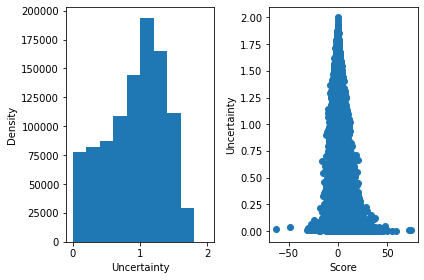

In [3]:
for dim in [50]:
    for wd in [0]:
        for lr in [5]:
            model = biasMF(data.n_user, data.n_item, embedding_dim=dim, lr=lr, weight_decay=wd, loss=ABPR(log_scale=False))
            train(model, data, path='checkpoints/ABPR', name=f'dim={dim}-wd={wd}-lr={lr}')



## Log scale

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/vcoscrato/.local/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 1.3 M 
1 | item_embeddings | Embedding | 1.5 M 
2 | user_bias       | Embedding | 25.9 K
3 | item_bias       | Embedding | 30.5 K
4 | rho_activation  | Softplus  | 0     
----------------------------------------------
2.9 M     Trainable params
0         Non-trainable params
2.9 M     Total params
11.509    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has 

  0%|          | 0/1000 [00:00<?, ?it/s]

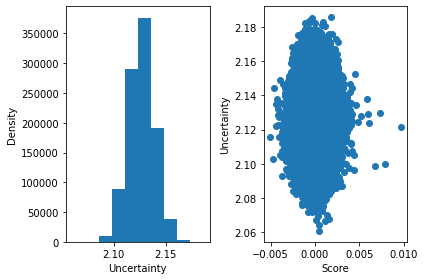

In [4]:
for dim in [50]:
    for wd in [0]:
        for lr in [5]:
            model = biasMF(data.n_user, data.n_item, embedding_dim=dim, lr=lr, weight_decay=wd, loss=ABPR(log_scale=True))
            train(model, data, path='checkpoints/ABPRlog', name=f'dim={dim}-wd={wd}-lr={lr}')

files = {file: float(file.split('loss=')[1][:-5]) for file in os.listdir('checkpoints/ABPRlog')}
model = biasMF(data.n_user, data.n_item, embedding_dim=1, lr=0, weight_decay=0, loss=ABPR(log_scale=True))
model = model.load_from_checkpoint(os.path.join('checkpoints/ABPRlog', min(files, key=files.get)))
test(model, data, name='ABPRlog', max_k=10, use_baseline=False)
unc_distribution(model)

# Gaussian Personalized Ranking (GPR)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/vcoscrato/.local/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 1.3 M 
1 | item_embeddings | Embedding | 1.5 M 
2 | user_bias       | Embedding | 25.9 K
3 | item_bias       | Embedding | 30.5 K
4 | rho_activation  | Softplus  | 0     
----------------------------------------------
2.9 M     Trainable params
0         Non-trainable params
2.9 M     Total params
11.509    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

/home/vcoscrato/.local/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  rank_zero_deprecation(


  0%|          | 0/1000 [00:00<?, ?it/s]

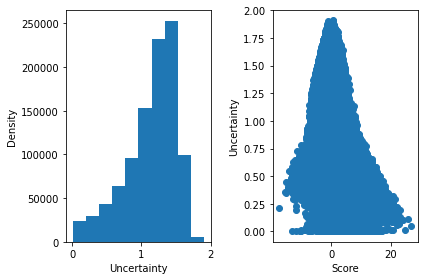

In [5]:
for dim in [50]:
    for wd in [0]:
        for lr in [5]:
            model = biasMF(data.n_user, data.n_item, embedding_dim=dim, lr=lr, weight_decay=wd, loss=GPR(log_scale=False))
            train(model, data, path='checkpoints/GPR', name=f'dim={dim}-wd={wd}-lr={lr}')

files = {file: float(file.split('loss=')[1][:-5]) for file in os.listdir('checkpoints/GPR')}
model = biasMF(data.n_user, data.n_item, embedding_dim=1, lr=0, weight_decay=0, loss=GPR(log_scale=False))
model = model.load_from_checkpoint(os.path.join('checkpoints/GPR', min(files, key=files.get)))
test(model, data, name='GPR', max_k=10, use_baseline=False)
unc_distribution(model)

## Log scale

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/vcoscrato/.local/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 1.3 M 
1 | item_embeddings | Embedding | 1.5 M 
2 | user_bias       | Embedding | 25.9 K
3 | item_bias       | Embedding | 30.5 K
4 | rho_activation  | Softplus  | 0     
----------------------------------------------
2.9 M     Trainable params
0         Non-trainable params
2.9 M     Total params
11.509    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
/home/vcoscrato/.local/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior

  0%|          | 0/1000 [00:00<?, ?it/s]

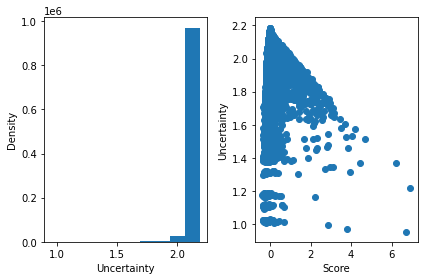

In [6]:
for dim in [50]:
    for wd in [0]:
        for lr in [1]:
            model = biasMF(data.n_user, data.n_item, embedding_dim=dim, lr=lr, weight_decay=wd, loss=GPR(log_scale=True))
            train(model, data, path='checkpoints/GPRlog', name=f'dim={dim}-wd={wd}-lr={lr}')

files = {file: float(file.split('loss=')[1][:-5]) for file in os.listdir('checkpoints/GPRlog')}
model = biasMF(data.n_user, data.n_item, embedding_dim=1, lr=0, weight_decay=0, loss=GPR(log_scale=True))
model = model.load_from_checkpoint(os.path.join('checkpoints/GPRlog', min(files, key=files.get)))
test(model, data, name='GPRlog', max_k=10, use_baseline=False)
unc_distribution(model)

# DoubleMF

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/vcoscrato/.local/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                | Type      | Params
--------------------------------------------------
0 | user_embeddings     | Embedding | 1.3 M 
1 | item_embeddings     | Embedding | 1.5 M 
2 | user_embeddings_rho | Embedding | 1.3 M 
3 | item_embeddings_rho | Embedding | 1.5 M 
4 | rho_activation      | Softplus  | 0     
--------------------------------------------------
5.6 M     Trainable params
0         Non-trainable params
5.6 M     Total params
22.566    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

/home/vcoscrato/.local/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  rank_zero_deprecation(


  0%|          | 0/1000 [00:00<?, ?it/s]

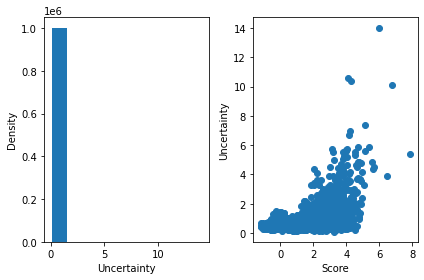

In [7]:
for dim in [50]:
    for wd in [0]:
        for lr in [1]:
            model = TwoWayMF(data.n_user, data.n_item, embedding_dim=dim, lr=lr, weight_decay=wd, loss=GPR(log_scale=True))
            train(model, data, path='checkpoints/GPRlog_MF', name=f'dim={dim}-wd={wd}-lr={lr}')

files = {file: float(file.split('loss=')[1][:-5]) for file in os.listdir('checkpoints/GPRlog_MF')}
model = TwoWayMF(data.n_user, data.n_item, embedding_dim=1, lr=0, weight_decay=0, loss=GPR(log_scale=True))
model = model.load_from_checkpoint(os.path.join('checkpoints/GPRlog_MF', min(files, key=files.get)))
test(model, data, name='GPRlog_MF', max_k=10, use_baseline=False)
unc_distribution(model)

# GMF

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/vcoscrato/.local/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 1.3 M 
1 | item_embeddings | Embedding | 1.5 M 
2 | linear          | Linear    | 100   
3 | rho_activation  | Softplus  | 0     
----------------------------------------------
2.8 M     Trainable params
0         Non-trainable params
2.8 M     Total params
11.284    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has not been met. Training will continue...
Trainer was signaled to stop but required minimum epochs (20) or minimum steps (None) has 

  0%|          | 0/1000 [00:00<?, ?it/s]

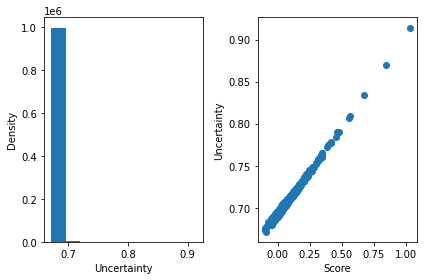

In [8]:
for dim in [50]:
    for wd in [0]:
        for lr in [1]:
            model = bprGMF(data.n_user, data.n_item, embedding_dim=dim, lr=lr, weight_decay=wd, loss=GPR(log_scale=True))
            train(model, data, path='checkpoints/GPRlog_GMF', name=f'dim={dim}-wd={wd}-lr={lr}')

files = {file: float(file.split('loss=')[1][:-5]) for file in os.listdir('checkpoints/GPRlog_GMF')}
model = bprGMF(data.n_user, data.n_item, embedding_dim=1, lr=0, weight_decay=0, loss=GPR(log_scale=True))
model = model.load_from_checkpoint(os.path.join('checkpoints/GPRlog_GMF', min(files, key=files.get)))
test(model, data, name='GPRlog_GMF', max_k=10, use_baseline=False)
unc_distribution(model)

# Results

In [9]:
results = {}
for key in os.listdir('results'):
    results[key.replace('.pkl', '').replace('_', ' ')] = pickle.load(open(os.path.join('results', key), 'rb'))
results = dict(sorted(results.items()))
NDCG = [results[a]['accuracy']['NDCG'][-1] for a in results]
RRI = [results[a]['uncertainty']['RRI'][-1] if 'PR' in a else np.NaN for a in results]
UncertainNDCG = [results[a]['uncertain_accuracy']['NDCG'][-1] if 'PR' in a else np.NaN for a in results]
interesting_stuff = pd.DataFrame({'NDCG': NDCG, 'RRI': RRI, 'UncertainNDCG': UncertainNDCG}, index=results)
interesting_stuff

,NDCG,RRI,UncertainNDCG
ABPR,0.001050,0.008441,0.001064
ABPRlog,0.000437,0.000083,0.000133
Baseline,0.003071,NaN,NaN
GPR,0.003718,0.037302,0.003766
GPRlog,0.003264,0.127780,0.003299
GPRlog GMF,0.002666,-0.059406,0.002699
GPRlog MF,0.004787,0.017931,0.004338
